https://www.kaggle.com/datasets/yashdevladdha/uber-ride-analytics-dashboard

https://drive.google.com/file/d/12ewv7NJ724zIQKidXQ1pxJU4mdwZqmc9/view?usp=sharing

# Загрузка файла

In [14]:
!gdown --id 12ewv7NJ724zIQKidXQ1pxJU4mdwZqmc9

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=12ewv7NJ724zIQKidXQ1pxJU4mdwZqmc9
To: /content/Uber_2024.zip
100% 17.3M/17.3M [00:00<00:00, 42.4MB/s]


# Распаковка архива

In [15]:
!unzip /content/Uber_2024.zip

Archive:  /content/Uber_2024.zip
replace Dasboard.gif? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace Dasboard.gif? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Dasboard.gif            
  inflating: Uber.pbix               
  inflating: ncr_ride_bookings.csv   


# Импорт необходимых библиотек и загрузка данных

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Настройка стиля графиков
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

# Загрузка данных
df = pd.read_csv('ncr_ride_bookings.csv')

# Первый взгляд на данные
print("Размер датасета:", df.shape)
print("\nПервые 5 строк:")
display(df.head())

Размер датасета: (150000, 21)

Первые 5 строк:


,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


# Предобработка данных

In [20]:
# Основная информация о данных
print("Информация о датасете:")
df.info()

# Проверка пропущенных значений
print("\nПропущенные значения:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

# Создаем копию для анализа
df_clean = df.copy()

# Обработка datetime
df_clean['datetime'] = pd.to_datetime(df_clean['Date'] + ' ' + df_clean['Time'])
df_clean['hour'] = df_clean['datetime'].dt.hour
df_clean['day_of_week'] = df_clean['datetime'].dt.day_name()
df_clean['month'] = df_clean['datetime'].dt.month_name()

# Заполнение пропущенных значений в рейтингах
df_clean['Driver Ratings'] = df_clean['Driver Ratings'].fillna(0)
df_clean['Customer Rating'] = df_clean['Customer Rating'].fillna(0)

# Базовая статистика
print("\nБазовая статистика числовых колонок:")
display(df_clean.describe())

Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cance

,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating,datetime,hour
count,139500.000000,102000.000000,10500.0,27000.0,9000.0,102000.000000,102000.000000,150000.000000,150000.000000,150000,150000.000000
mean,8.456352,29.149636,1.0,1.0,1.0,508.295912,24.637012,2.623215,2.730842,2024-07-01 07:14:41.251033344,14.034113
min,2.000000,10.000000,1.0,1.0,1.0,50.000000,1.000000,0.000000,0.000000,2024-01-01 00:19:34,0.000000
25%,5.300000,21.600000,1.0,1.0,1.0,234.000000,12.460000,0.000000,0.000000,2024-03-31 22:55:36.249999872,10.000000
50%,8.300000,28.800000,1.0,1.0,1.0,414.000000,23.720000,3.900000,4.100000,2024-07-01 09:24:52.500000,15.000000
75%,11.300000,36.800000,1.0,1.0,1.0,689.000000,36.820000,4.300000,4.600000,2024-09-30 13:46:07.249999872,18.000000
max,20.000000,45.000000,1.0,1.0,1.0,4277.000000,50.000000,5.000000,5.000000,2024-12-30 23:36:11,23.000000
std,3.773564,8.902577,0.0,0.0,0.0,395.805774,14.002138,2.082283,2.165548,NaN,5.416906


# Анализ статусов бронирований

Распределение статусов бронирований:


,Count,Percentage
Booking Status,,
Completed,93000,62.0
Cancelled by Driver,27000,18.0
No Driver Found,10500,7.0
Cancelled by Customer,10500,7.0
Incomplete,9000,6.0


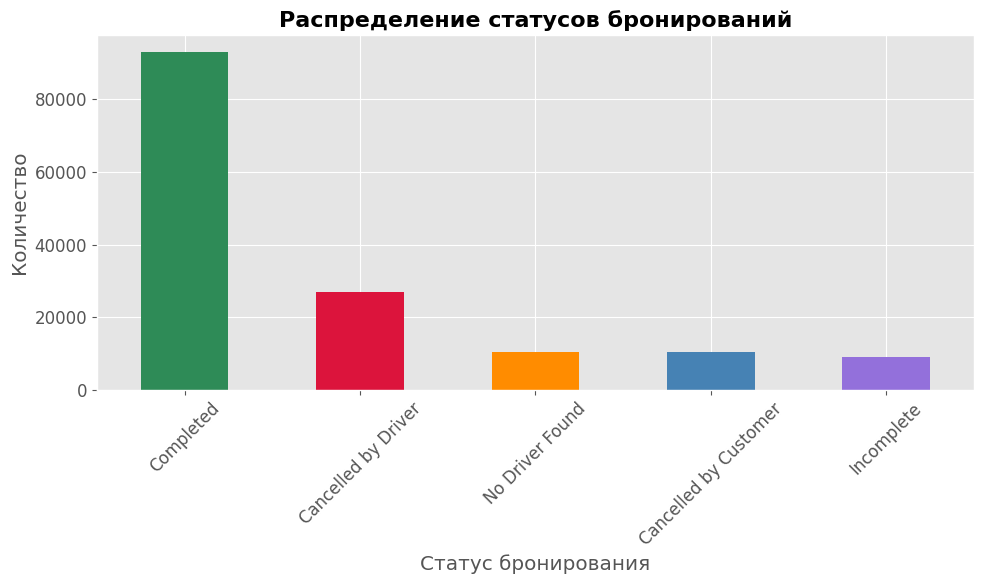

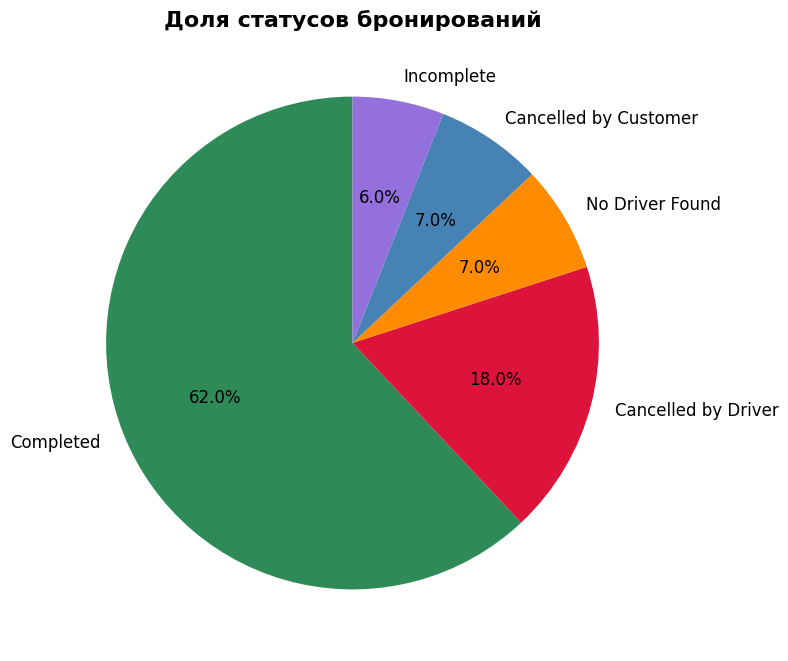

In [21]:
# Анализ статусов бронирований
status_counts = df_clean['Booking Status'].value_counts()
status_percentage = df_clean['Booking Status'].value_counts(normalize=True) * 100

print("Распределение статусов бронирований:")
status_df = pd.DataFrame({
    'Count': status_counts,
    'Percentage': status_percentage
})
display(status_df)

# Визуализация
plt.figure(figsize=(10, 6))
colors = ['#2E8B57', '#DC143C', '#FF8C00', '#4682B4', '#9370DB']
status_counts.plot(kind='bar', color=colors)
plt.title('Распределение статусов бронирований', fontsize=16, fontweight='bold')
plt.xlabel('Статус бронирования')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Круговой график
plt.figure(figsize=(8, 8))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%',
        colors=colors, startangle=90)
plt.title('Доля статусов бронирований', fontsize=16, fontweight='bold')
plt.show()

# Анализ по типам транспортных средств

Статистика по типам транспортных средств:


,Total Bookings,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Success Rate
Vehicle Type,,,,,,
Auto,37419,506.725241,24.615996,2.619004,2.723972,61.880328
Go Mini,29806,507.684934,24.612090,2.630997,2.740901,62.232436
Go Sedan,27141,511.503385,24.609325,2.600114,2.709594,61.442099
Bike,22517,510.200299,24.649546,2.636435,2.744811,62.326242
Premier Sedan,18111,509.568169,24.598956,2.631036,2.735779,62.127989
eBike,10557,503.897090,24.990415,2.622146,2.732812,62.053614
Uber XL,4449,501.816749,24.402893,2.651225,2.755383,62.553383


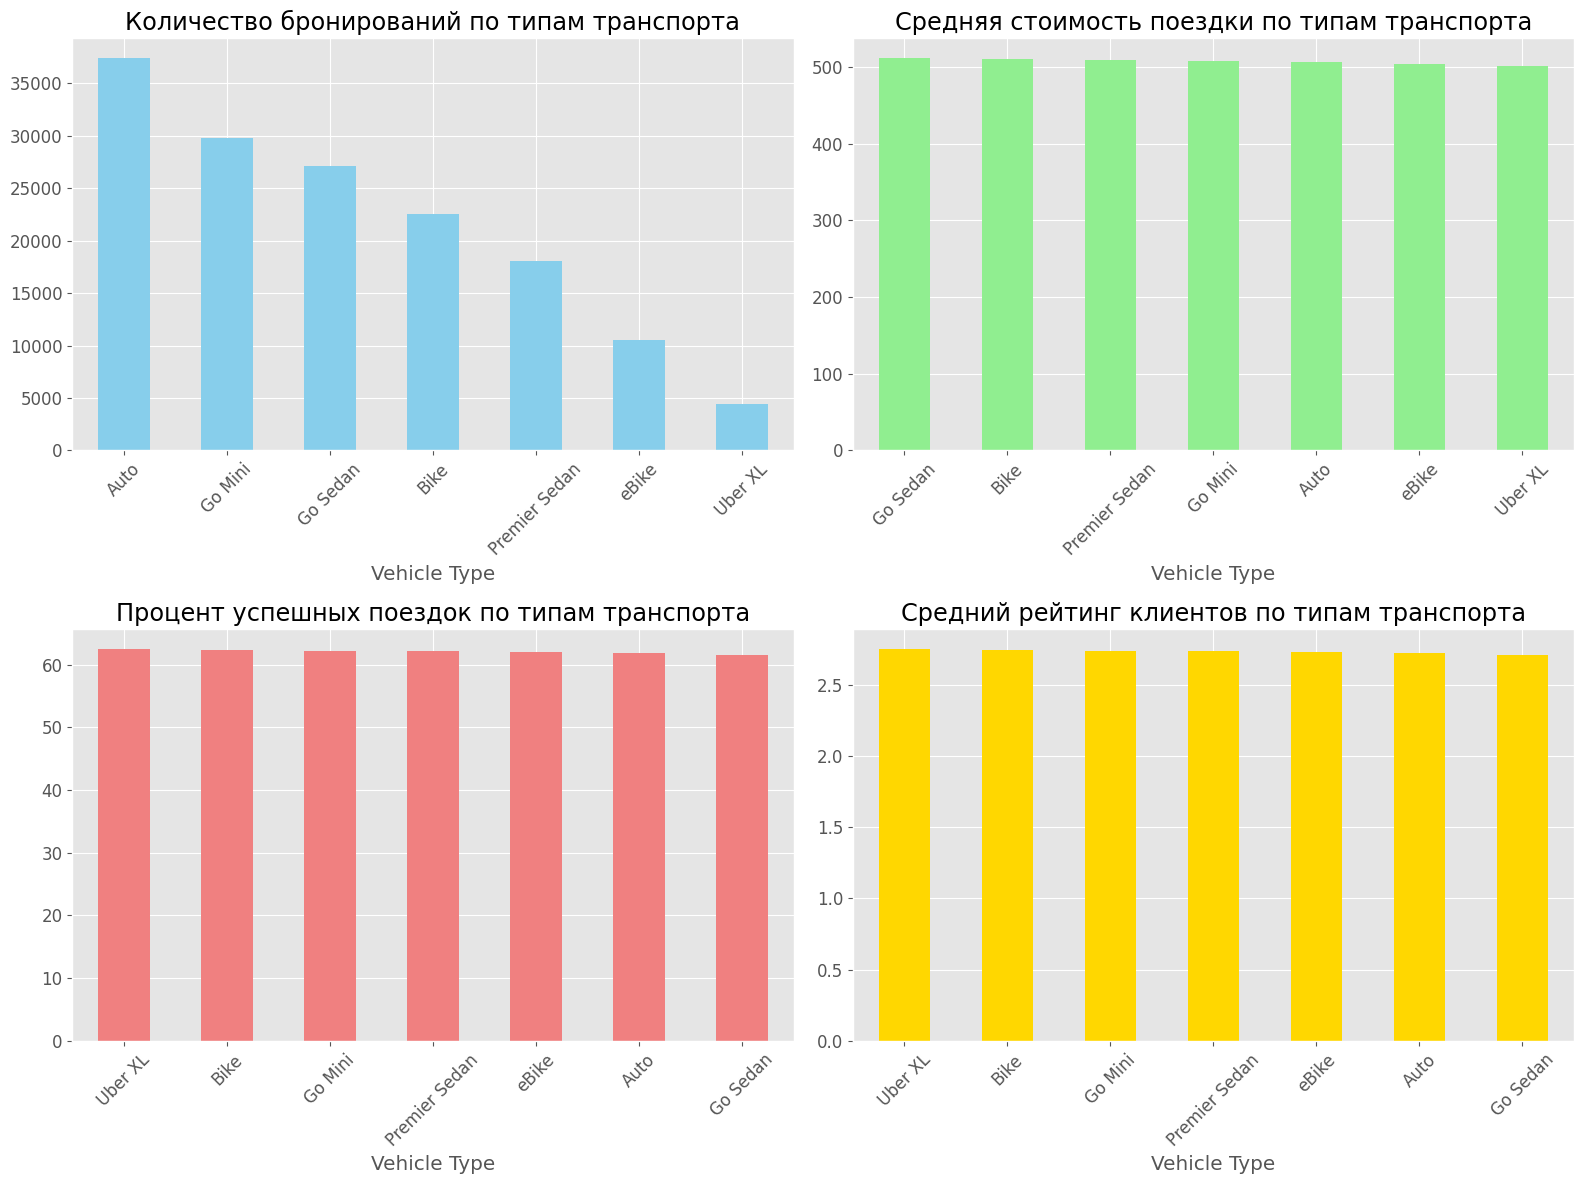

In [22]:
# Анализ по типам транспортных средств
vehicle_stats = df_clean.groupby('Vehicle Type').agg({
    'Booking ID': 'count',
    'Booking Value': 'mean',
    'Ride Distance': 'mean',
    'Driver Ratings': 'mean',
    'Customer Rating': 'mean'
}).rename(columns={'Booking ID': 'Total Bookings'})

vehicle_stats['Success Rate'] = df_clean[df_clean['Booking Status'] == 'Completed'].groupby('Vehicle Type')['Booking ID'].count() / vehicle_stats['Total Bookings'] * 100

print("Статистика по типам транспортных средств:")
display(vehicle_stats.sort_values('Total Bookings', ascending=False))

# Визуализация
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Количество бронирований по типам
vehicle_stats['Total Bookings'].sort_values(ascending=False).plot(
    kind='bar', ax=axes[0,0], color='skyblue')
axes[0,0].set_title('Количество бронирований по типам транспорта')
axes[0,0].tick_params(axis='x', rotation=45)

# Средняя стоимость поездки
vehicle_stats['Booking Value'].sort_values(ascending=False).plot(
    kind='bar', ax=axes[0,1], color='lightgreen')
axes[0,1].set_title('Средняя стоимость поездки по типам транспорта')
axes[0,1].tick_params(axis='x', rotation=45)

# Процент успешных поездок
vehicle_stats['Success Rate'].sort_values(ascending=False).plot(
    kind='bar', ax=axes[1,0], color='lightcoral')
axes[1,0].set_title('Процент успешных поездок по типам транспорта')
axes[1,0].tick_params(axis='x', rotation=45)

# Средний рейтинг клиентов
vehicle_stats['Customer Rating'].sort_values(ascending=False).plot(
    kind='bar', ax=axes[1,1], color='gold')
axes[1,1].set_title('Средний рейтинг клиентов по типам транспорта')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Анализ отмен поездок

Причины отмен клиентами:


,count
Reason for cancelling by Customer,
Wrong Address,2362
Change of plans,2353
Driver is not moving towards pickup location,2335
Driver asked to cancel,2295
AC is not working,1155



Причины отмен водителями:


,count
Driver Cancellation Reason,
Customer related issue,6837
The customer was coughing/sick,6751
Personal & Car related issues,6726
More than permitted people in there,6686


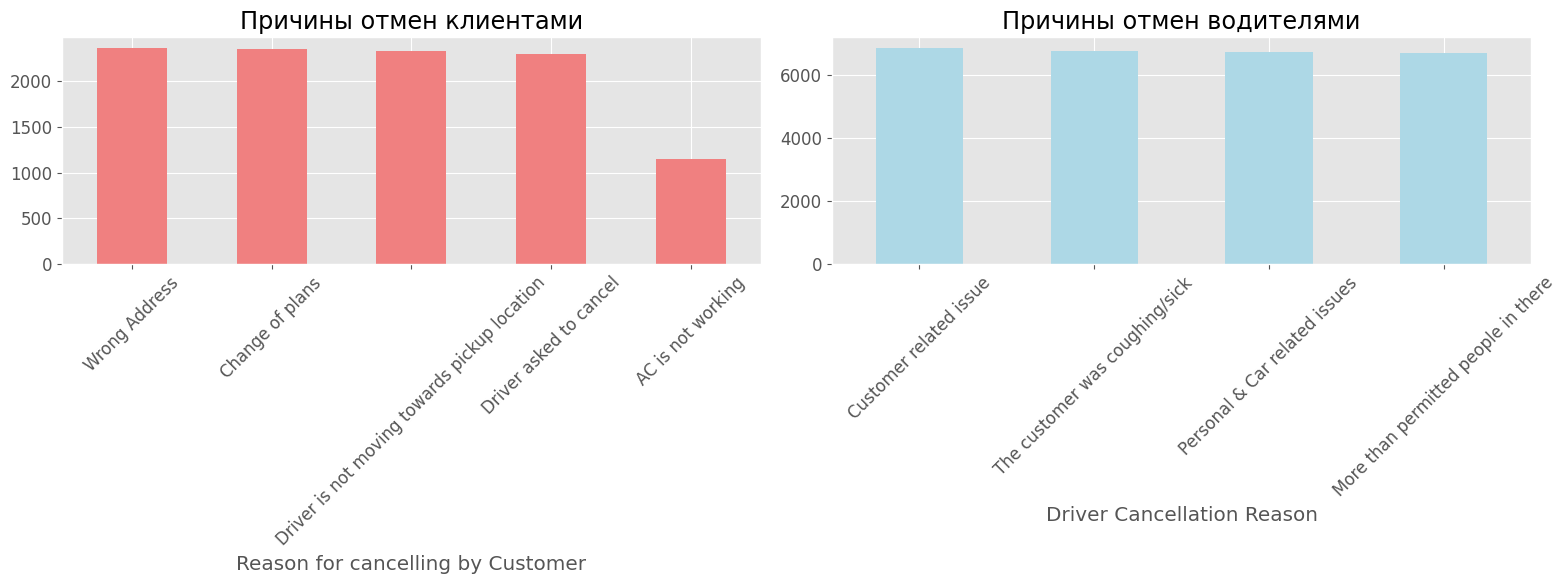

In [23]:
# Анализ отмен клиентами
customer_cancellations = df_clean[df_clean['Cancelled Rides by Customer'] == 1]
customer_reasons = customer_cancellations['Reason for cancelling by Customer'].value_counts()

print("Причины отмен клиентами:")
display(customer_reasons)

# Анализ отмен водителями
driver_cancellations = df_clean[df_clean['Cancelled Rides by Driver'] == 1]
driver_reasons = driver_cancellations['Driver Cancellation Reason'].value_counts()

print("\nПричины отмен водителями:")
display(driver_reasons)

# Визуализация причин отмен
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

customer_reasons.plot(kind='bar', ax=axes[0], color='lightcoral')
axes[0].set_title('Причины отмен клиентами')
axes[0].tick_params(axis='x', rotation=45)

driver_reasons.plot(kind='bar', ax=axes[1], color='lightblue')
axes[1].set_title('Причины отмен водителями')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Временной анализ

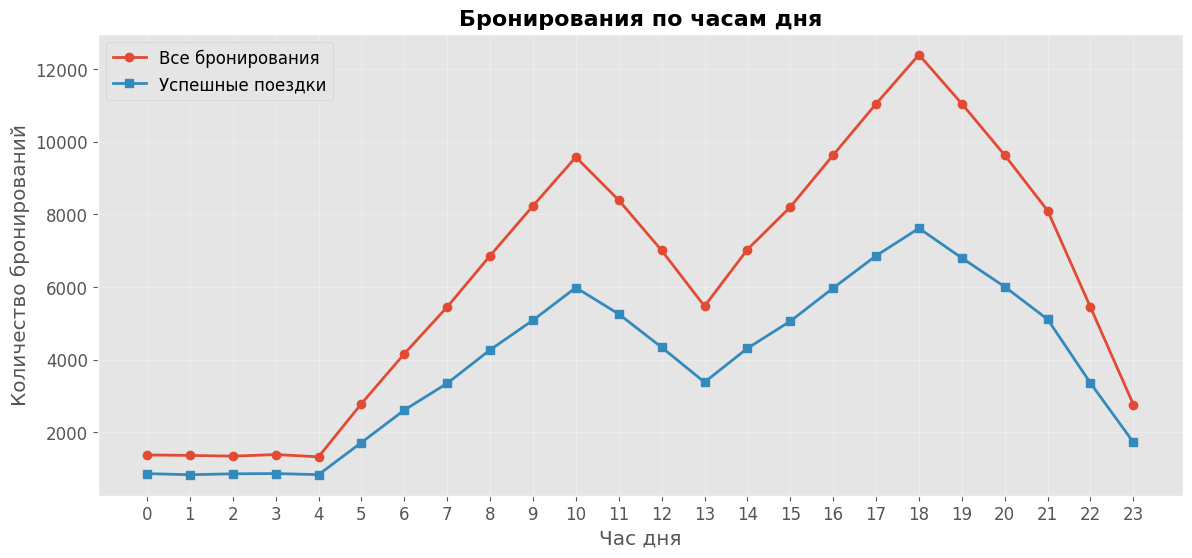

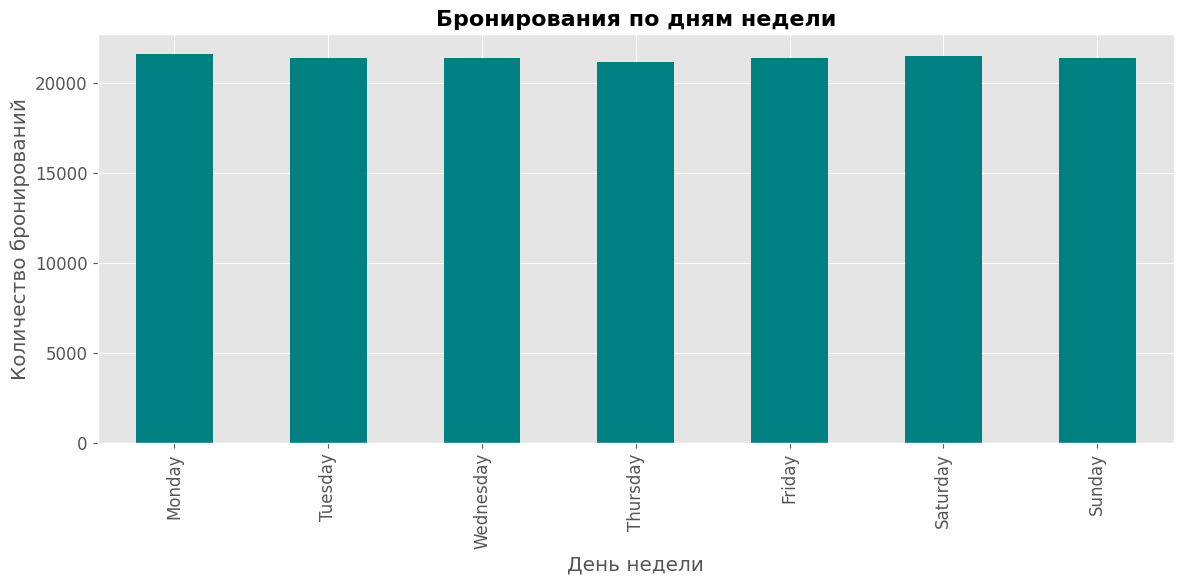

In [24]:
# Анализ по часам
hourly_bookings = df_clean.groupby('hour')['Booking ID'].count()
hourly_completed = df_clean[df_clean['Booking Status'] == 'Completed'].groupby('hour')['Booking ID'].count()

plt.figure(figsize=(14, 6))
plt.plot(hourly_bookings.index, hourly_bookings.values, marker='o', label='Все бронирования', linewidth=2)
plt.plot(hourly_completed.index, hourly_completed.values, marker='s', label='Успешные поездки', linewidth=2)
plt.title('Бронирования по часам дня', fontsize=16, fontweight='bold')
plt.xlabel('Час дня')
plt.ylabel('Количество бронирований')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(range(0, 24))
plt.show()

# Анализ по дням недели
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_bookings = df_clean.groupby('day_of_week')['Booking ID'].count().reindex(day_order)

plt.figure(figsize=(12, 6))
daily_bookings.plot(kind='bar', color='teal')
plt.title('Бронирования по дням недели', fontsize=16, fontweight='bold')
plt.xlabel('День недели')
plt.ylabel('Количество бронирований')
plt.tight_layout()
plt.show()

# Анализ платежей и стоимости

Статистика по методам оплаты:


,Total Bookings,Average Value,Total Revenue
Payment Method,,,
UPI,45909,508.51,23345101.0
Cash,25367,508.36,12895649.0
Uber Wallet,12276,505.12,6200898.0
Credit Card,10209,511.71,5224025.0
Debit Card,8239,507.41,4180510.0


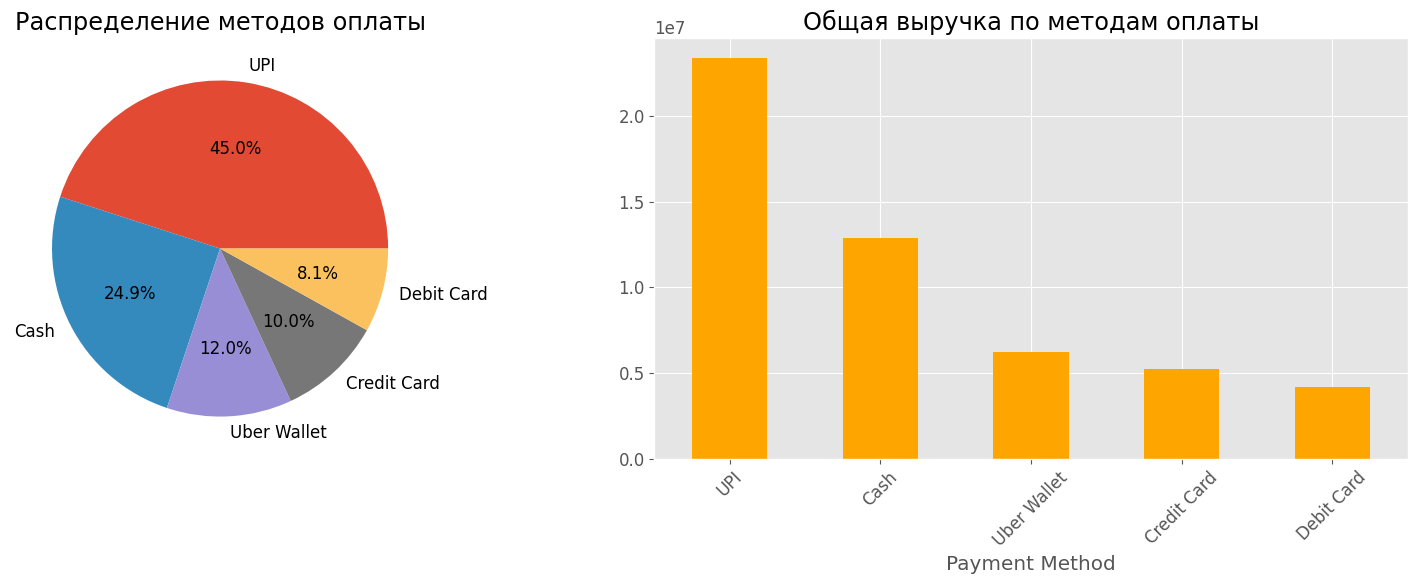

In [25]:
# Анализ методов оплаты
payment_stats = df_clean.groupby('Payment Method').agg({
    'Booking ID': 'count',
    'Booking Value': ['mean', 'sum']
}).round(2)

payment_stats.columns = ['Total Bookings', 'Average Value', 'Total Revenue']
payment_stats = payment_stats.sort_values('Total Bookings', ascending=False)

print("Статистика по методам оплаты:")
display(payment_stats)

# Визуализация
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

payment_stats['Total Bookings'].plot(kind='pie', autopct='%1.1f%%', ax=axes[0])
axes[0].set_title('Распределение методов оплаты')
axes[0].set_ylabel('')

payment_stats['Total Revenue'].plot(kind='bar', ax=axes[1], color='orange')
axes[1].set_title('Общая выручка по методам оплаты')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Географический анализ

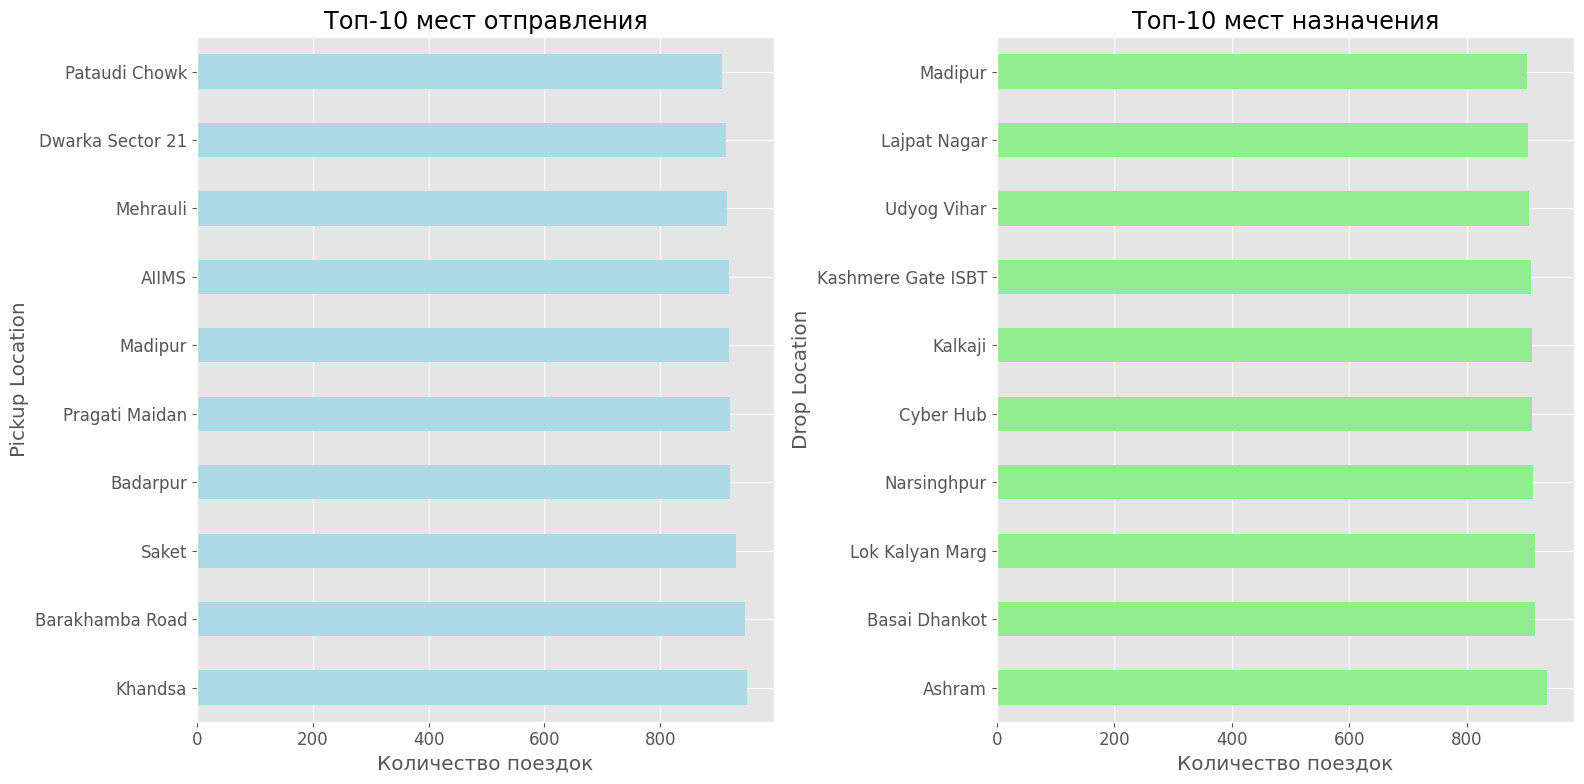

Статистика по популярным маршрутам:


,,Booking ID,Booking Value,Ride Distance
Pickup Location,Drop Location,,,
DLF City Court,Bhiwadi,17,429.214286,29.642143
Akshardham,RK Puram,16,558.777778,19.907778
Janakpuri,Faridabad Sector 15,16,506.800000,21.217000
Ghaziabad,Badshahpur,15,491.285714,24.361429
Jor Bagh,Rohini East,15,214.125000,25.902500
Rithala,Udyog Vihar Phase 4,15,575.000000,18.859091
Vatika Chowk,Rithala,15,364.111111,17.095556
Chirag Delhi,Noida Film City,14,423.750000,23.610000
Connaught Place,Paharganj,14,499.100000,26.238000


In [26]:
# Анализ популярных мест отправления и назначения
top_pickups = df_clean['Pickup Location'].value_counts().head(10)
top_drops = df_clean['Drop Location'].value_counts().head(10)

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

top_pickups.plot(kind='barh', ax=axes[0], color='lightblue')
axes[0].set_title('Топ-10 мест отправления')
axes[0].set_xlabel('Количество поездок')

top_drops.plot(kind='barh', ax=axes[1], color='lightgreen')
axes[1].set_title('Топ-10 мест назначения')
axes[1].set_xlabel('Количество поездок')

plt.tight_layout()
plt.show()

# Анализ средней стоимости поездки по маршрутам
route_stats = df_clean.groupby(['Pickup Location', 'Drop Location']).agg({
    'Booking ID': 'count',
    'Booking Value': 'mean',
    'Ride Distance': 'mean'
}).nlargest(10, 'Booking ID')

print("Статистика по популярным маршрутам:")
display(route_stats)

# Анализ рейтингов

Анализ рейтингов для завершенных поездок:


,Driver Ratings,Customer Rating
mean,4.230992,4.404584
std,0.436871,0.437819
count,93000.000000,93000.000000


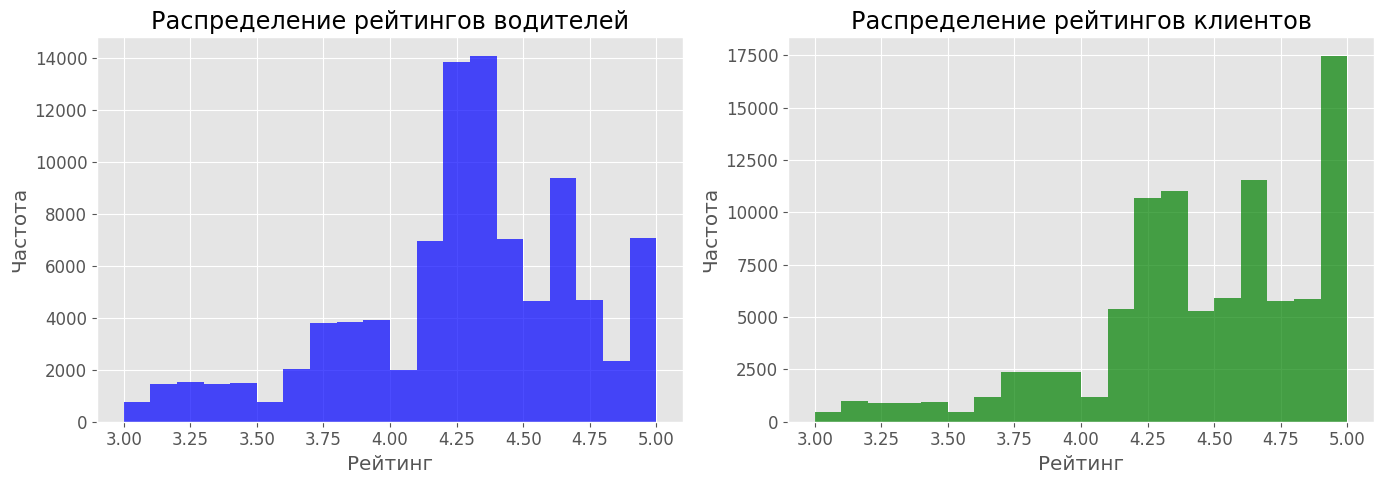

In [27]:
# Анализ рейтингов
ratings_analysis = df_clean[df_clean['Booking Status'] == 'Completed'].agg({
    'Driver Ratings': ['mean', 'std', 'count'],
    'Customer Rating': ['mean', 'std', 'count']
})

print("Анализ рейтингов для завершенных поездок:")
display(ratings_analysis)

# Распределение рейтингов
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

df_clean[df_clean['Driver Ratings'] > 0]['Driver Ratings'].hist(bins=20, ax=axes[0], alpha=0.7, color='blue')
axes[0].set_title('Распределение рейтингов водителей')
axes[0].set_xlabel('Рейтинг')
axes[0].set_ylabel('Частота')

df_clean[df_clean['Customer Rating'] > 0]['Customer Rating'].hist(bins=20, ax=axes[1], alpha=0.7, color='green')
axes[1].set_title('Распределение рейтингов клиентов')
axes[1].set_xlabel('Рейтинг')
axes[1].set_ylabel('Частота')

plt.tight_layout()
plt.show()

 # Анализ рейтингов

Анализ рейтингов для завершенных поездок:


,Driver Ratings,Customer Rating
mean,4.230992,4.404584
std,0.436871,0.437819
count,93000.000000,93000.000000


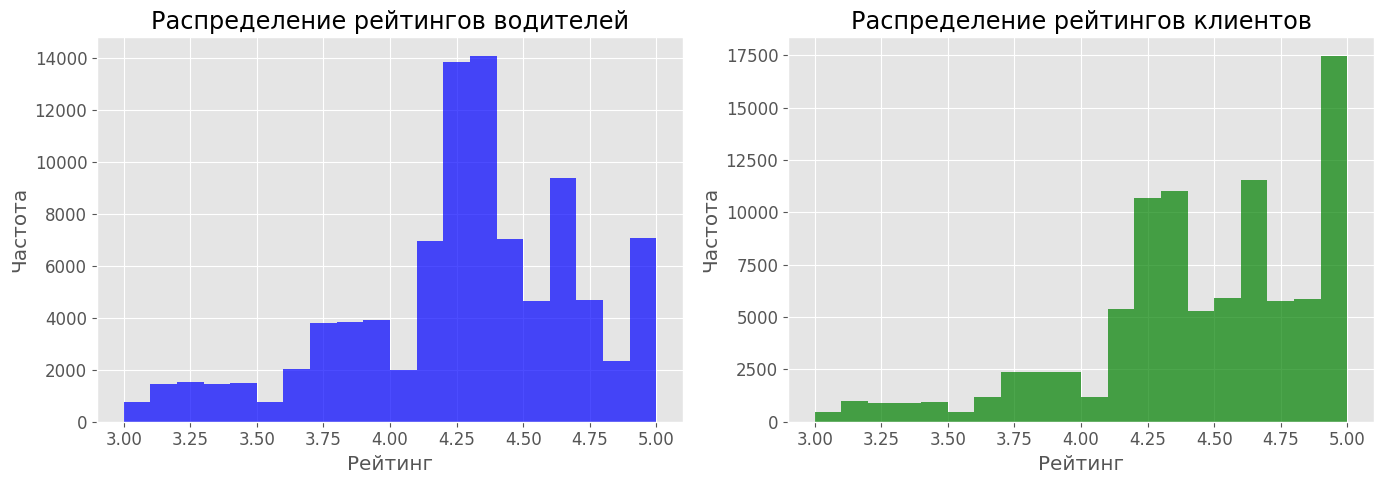

In [28]:
# Анализ рейтингов
ratings_analysis = df_clean[df_clean['Booking Status'] == 'Completed'].agg({
    'Driver Ratings': ['mean', 'std', 'count'],
    'Customer Rating': ['mean', 'std', 'count']
})

print("Анализ рейтингов для завершенных поездок:")
display(ratings_analysis)

# Распределение рейтингов
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

df_clean[df_clean['Driver Ratings'] > 0]['Driver Ratings'].hist(bins=20, ax=axes[0], alpha=0.7, color='blue')
axes[0].set_title('Распределение рейтингов водителей')
axes[0].set_xlabel('Рейтинг')
axes[0].set_ylabel('Частота')

df_clean[df_clean['Customer Rating'] > 0]['Customer Rating'].hist(bins=20, ax=axes[1], alpha=0.7, color='green')
axes[1].set_title('Распределение рейтингов клиентов')
axes[1].set_xlabel('Рейтинг')
axes[1].set_ylabel('Частота')

plt.tight_layout()
plt.show()

# Корреляционный анализ

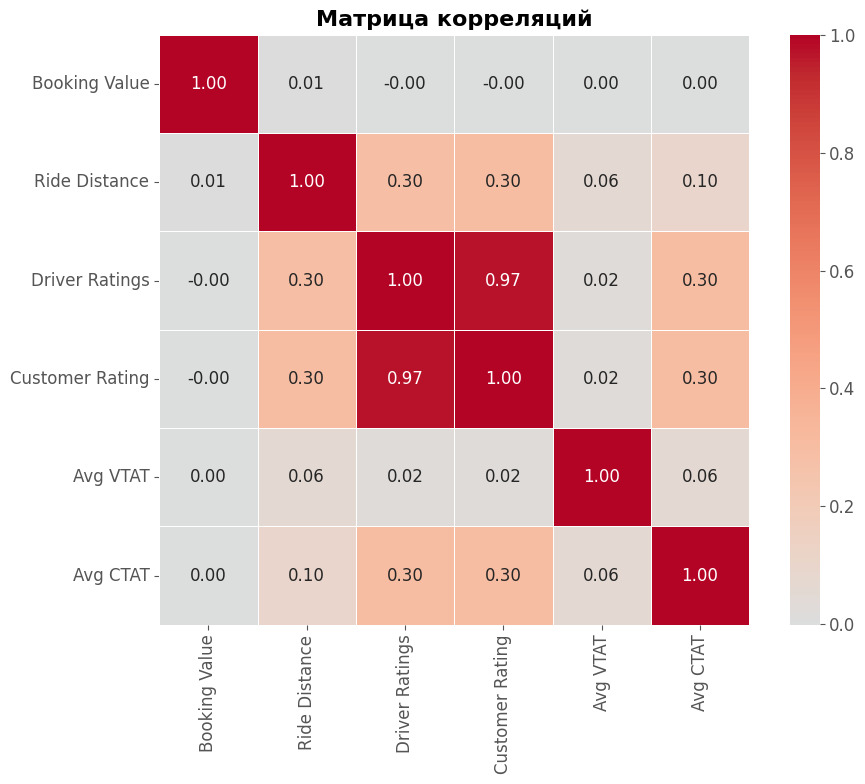

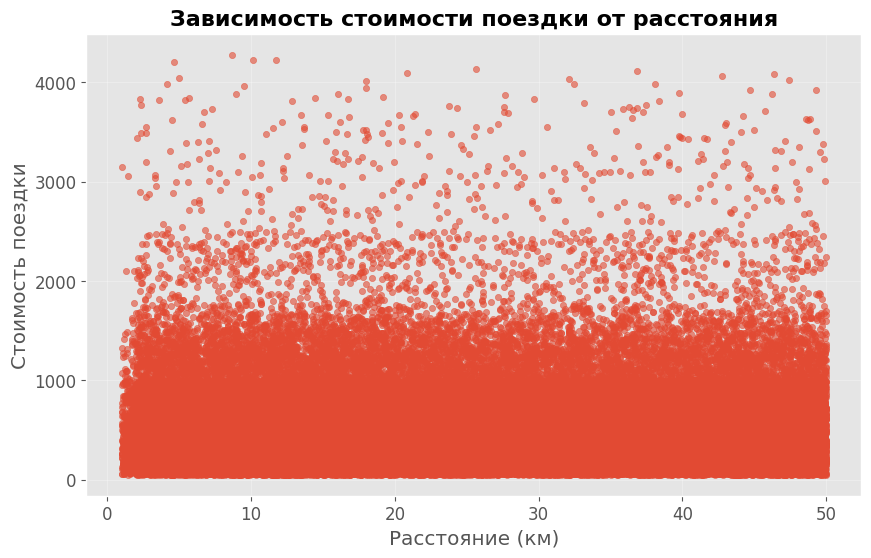

In [29]:
# Корреляционный анализ числовых признаков
numeric_cols = ['Booking Value', 'Ride Distance', 'Driver Ratings', 'Customer Rating', 'Avg VTAT', 'Avg CTAT']
correlation_matrix = df_clean[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f', linewidths=0.5)
plt.title('Матрица корреляций', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Анализ зависимости стоимости от расстояния
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['Ride Distance'], df_clean['Booking Value'], alpha=0.6, s=20)
plt.title('Зависимость стоимости поездки от расстояния', fontsize=16, fontweight='bold')
plt.xlabel('Расстояние (км)')
plt.ylabel('Стоимость поездки')
plt.grid(True, alpha=0.3)
plt.show()

# Итоговый отчет

In [30]:
# Создание итогового отчета
print("=" * 60)
print("ИТОГОВЫЙ АНАЛИТИЧЕСКИЙ ОТЧЕТ UBER NCR 2024")
print("=" * 60)

total_bookings = len(df_clean)
completed = len(df_clean[df_clean['Booking Status'] == 'Completed'])
cancelled_customer = len(df_clean[df_clean['Cancelled Rides by Customer'] == 1])
cancelled_driver = len(df_clean[df_clean['Cancelled Rides by Driver'] == 1])

print(f"Всего бронирований: {total_bookings:,}")
print(f"Успешных поездок: {completed} ({completed/total_bookings*100:.1f}%)")
print(f"Отменено клиентами: {cancelled_customer} ({cancelled_customer/total_bookings*100:.1f}%)")
print(f"Отменено водителями: {cancelled_driver} ({cancelled_driver/total_bookings*100:.1f}%)")
print(f"Средний рейтинг водителей: {df_clean[df_clean['Driver Ratings'] > 0]['Driver Ratings'].mean():.2f}")
print(f"Средний рейтинг клиентов: {df_clean[df_clean['Customer Rating'] > 0]['Customer Rating'].mean():.2f}")
print(f"Общая выручка: {df_clean['Booking Value'].sum():,.0f} у.е.")
print(f"Средняя стоимость поездки: {df_clean['Booking Value'].mean():.2f} у.е.")
print(f"Среднее расстояние поездки: {df_clean['Ride Distance'].mean():.2f} км")

# Самый популярный тип транспорта
popular_vehicle = df_clean['Vehicle Type'].value_counts().index[0]
print(f"Самый популярный тип транспорта: {popular_vehicle}")

# Самый популярный метод оплаты
popular_payment = df_clean['Payment Method'].value_counts().index[0]
print(f"Самый популярный метод оплаты: {popular_payment}")

ИТОГОВЫЙ АНАЛИТИЧЕСКИЙ ОТЧЕТ UBER NCR 2024
Всего бронирований: 150,000
Успешных поездок: 93000 (62.0%)
Отменено клиентами: 10500 (7.0%)
Отменено водителями: 27000 (18.0%)
Средний рейтинг водителей: 4.23
Средний рейтинг клиентов: 4.40
Общая выручка: 51,846,183 у.е.
Средняя стоимость поездки: 508.30 у.е.
Среднее расстояние поездки: 24.64 км
Самый популярный тип транспорта: Auto
Самый популярный метод оплаты: UPI
